
#   EDA and Classification Modelling on FIFA World Cup 2018 Data

<img src="https://raw.githubusercontent.com/IshaanM24/EDA/master/Images/FIFA/wc-russia-2018.png" align='left'><br/>

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Setting up Packages/Environment](#section2)<br>
  - 2.1 [Installations(one time)](#section201)<br>
  - 2.2 [Importing Packages](#section202)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Importing Dataset](#section301)<br>
  - 3.2 [Description of the Datasets](#section302)<br>
  - 3.3 [Pandas Profiling before Data Preprocessing](#section303)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Treating Missing Values](#section402)<br>
  - 4.3 [Pandas Profiling after Data Preprocessing](#section403)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [Best Teams in terms of Goals, Ball Possession, Pass Accuracy and Saves](#section501)<br>    
  - 5.2 [Distribution of Teams in Different Tournament Stages](#section502)<br>     
  - 5.3 [Distribution of Fouls and Cards among Teams](#section503)<br>
  - 5.4 [Distribution of MoM Award among Teams](#section504)<br>
  - 5.5 [Generating Summary of Statistics for Analysis](#section505)<br>
  - 5.6 [Teams with varoius Statistical Values at Different Rounds in Tournament](#section506)<br>
  - 5.7 [Dummification of Columns/ One Hot Encoding](#section507)<br>
  - 5.8 [Pair Plots to Study Distribution and Relationship between Parameters](#section508)<br>
  - 5.9 [Correlation Matrix (Heat Map to study correlation between EVs)](#section509)<br>
6. [Classification Modelling](#section6)<br>
 - 6.1 [Identifying and Dropping ID and Highly Correlated Columns](#section601)<br>
 - 6.2 [Preparing the data (X and y) for Classification Models](#section602)<br>
 - 6.3 [Splitting the data into Train and Test Dataset](#section603)<br>
 - 6.4 [Scaling (As we have a number of EVs with various different units)](#section604)<br>
 - 6.5 [Score Calcluator and Aggregator Function for Different Models](#section605)<br>
     - 6.6 [**Logistic Regression Model**](#section606)<br>
     - 6.7 [**Decision Tree Classification Model**](#section607)<br>
         - 6.7.1 [**Decision Tree Classification with GridSearchCV**](#section60701)<br>
     - 6.8 [**Random Forest Classification Model**](#section608)<br>
         - 6.8.1 [**Random Forest Classification with GridSearchCV**](#section60801)<br>
7. [Model Evaluation](#section7)<br>
8. [Understanding Evaluation Techniques and Conclusion](#section8)<br>



<a id=section1></a>
## 1. Problem Statement


### 1.1 Introduction :

The **2018 FIFA World Cup** was the **21st FIFA World Cup** contested by men's national teams and took place between **14 June and 15 July 2018** in **Russia**. It involved **32 teams**, of which 31 came through qualifying competitions, while as the host nation Russia qualified automatically.

This dataset contains the details/statistics of all matches played in FIFA World Cup 2018 with all football stats like goals, fouls, On/Off Target and various other features.




#### Problem Statement : 

With available dataset, we will try to explore and analyze the tournament based on the football parameters like goals, passes, shots, ball possession, free kicks etc.
We will look at -
- how teams progressed in different rounds and which teams played which rounds.
- how the Goals, Saves, Ball Possession% , MoM Awards etc are distributed among teams in the tournament.
- How does different parameters affect MoM.
- Fouls and Cards distribution and their impact on MoM.


**Try to Predict :**

- Diving into the data, we will try to predict if **Man of the Match** is awarded or not based on different football attributes from data.


<a id=section2></a>
## 2. Setting up Packages/Environment


<a id=section201></a>
### 2.1 Installations (one time)

In [1]:
#!pip install pandas-profiling --upgrade --user ##giving error   # To install pandas profiling please run this command.

#conda install -c conda-forge pandas-profiling                   #completed...uncomment if need to re-install

#!pip install pivottablejs                                       #installing Pivot Table JS package



<a id=section202></a>
### 2.2 Import Packages

In [208]:
import numpy as np
np.set_printoptions(precision=4)                    # To display values only upto four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

import pandas_profiling                             # To get Pandas profiling reports  

import plotly.express as px                         # To import plotly package for interacrive graphs
                     



from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix as cm ,roc_auc_score

<a id=section3></a>
## 3. Loading Data

<a id=section301></a>
### 3.1 Importing dataset

In [434]:
fifa_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/FIFA%202018%20Statistics.csv')                               # read_csv is used to read csv file
fifa_df.head(-10)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,06-07-2018,France,Uruguay,2,58,11,2,7,2,3,0,17,4,81,524,99,15,2,0,0,Yes,40.0,Quarter Finals,No,0,NaN,NaN
114,06-07-2018,Brazil,Belgium,1,57,26,9,7,10,8,1,16,2,89,557,104,14,2,0,0,No,NaN,Quarter Finals,No,0,1.0,13.0
115,06-07-2018,Belgium,Brazil,2,43,8,3,3,2,4,0,15,9,83,370,105,16,2,0,0,Yes,13.0,Quarter Finals,No,0,NaN,NaN
116,07-07-2018,Sweden,England,0,43,7,3,3,1,1,2,8,0,74,379,107,10,2,0,0,No,NaN,Quarter Finals,No,0,NaN,NaN


<a id=section302></a>
### 3.2 Description of Dataset

- This dataset contains the details/statistics of all matches played in **FIFA WorldCup 2018** with all stats regarding **goals**, **fouls**, **On/Off Target** and various other features.

- Column Details : 


| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
|Date							 |Match Date                                                                                  | 
|Team							 |Playing Team                                                                                |
|Opponent						 |Opponent Team                                                                               |
|Goal Scored					 |Number of goals scored by this team                                                         |
|Ball Possession				 |%Amount of time ball was in control by the team                                             |
|Attempts						 |Number of attempts to score goal                                                            |
|On								 |TargetNumber of shots on-target                                                             |
|Off							 |TargetNumber of shots that went off-target                                                  |
|Blocked						 |Number of opponent team's attempts blocked by the team                                      |
|Offsides                        |Number of corner shots used                                                                 |
|Corners						 |Number of off-side events								                                      |
|Free Kicks						 |Number of free-kicks used                                                                   |
|SavesNumber 					 |saves by the goal keeper                                                                    |
|Pass Accuracy					 |%Percentage of passes that reached the same team player as aimed                            |
|Passes							 |Total number of passes by the team                                                          |
|Distance Covered (Kms)			 |Total distance covered by the team members in this game                                     |
|Fouls Committed				 |Number of fouls committed by the team members                                               |
|Yellow Card					 |Number of Yellow warning received                                                           |
|Yellow & Red					 |Number of Yellow & Red warning received                                                     |
|Red 							 |Number of Red cards received                                                                |
|Man of the Match				 |Did this team member win Man of the Match?                                                  |
|1st Goal						 |When did the team score the 1st goal?                                                       |
|Round							 |Stage of the match                                                                          |
|PSO							 |Was there a penalty shootout (PSO) in this match?                                           |
|Goals in PSO					 |Number of goals scored in the Penalty shootout                                              |
|Own goals						 |Number of own goals                                                                         |
|Own goal Time					 |When did the team score own goal?                                                           |

In [435]:
fifa_df.shape

(128, 27)

In [436]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

- Insights from ```info()``` regarding our data:
    - Data conisists of a total of **128 rows** and **27 Columns**
    - **6** columns of **object** datatype and **21** columns of **numeric** datatype
    - Missing values in **3** columns, namely - **1st Goal**,**Own Goals** and **Own Goal Time**

In [437]:
fifa_df.describe(include='all')

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
count,128,128,128,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128,94.000000,128,128,128.000000,12.0,12.000000
unique,25,32,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,6,2,NaN,NaN,NaN
top,17-06-2018,Croatia,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Group Stage,No,NaN,NaN,NaN
freq,8,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,NaN,96,120,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,82.554688,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,NaN,39.457447,NaN,NaN,0.203125,1.0,45.833333
std,NaN,NaN,NaN,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,5.933766,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,NaN,24.496506,NaN,NaN,0.807049,0.0,29.978275
min,NaN,NaN,NaN,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,67.000000,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,NaN,0.000000,1.0,12.000000
25%,NaN,NaN,NaN,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,79.000000,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,NaN,18.250000,NaN,NaN,0.000000,1.0,21.750000
50%,NaN,NaN,NaN,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,83.000000,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,NaN,39.000000,NaN,NaN,0.000000,1.0,35.000000
75%,NaN,NaN,NaN,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,87.000000,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,NaN,54.750000,NaN,NaN,0.000000,1.0,75.750000


In [438]:
fifa_df.isnull().sum()

Date                      0  
Team                      0  
Opponent                  0  
Goal Scored               0  
Ball Possession %         0  
Attempts                  0  
On-Target                 0  
Off-Target                0  
Blocked                   0  
Corners                   0  
Offsides                  0  
Free Kicks                0  
Saves                     0  
Pass Accuracy %           0  
Passes                    0  
Distance Covered (Kms)    0  
Fouls Committed           0  
Yellow Card               0  
Yellow & Red              0  
Red                       0  
Man of the Match          0  
1st Goal                  34 
Round                     0  
PSO                       0  
Goals in PSO              0  
Own goals                 116
Own goal Time             116
dtype: int64

In [439]:
fifa_df[(fifa_df['1st Goal'].isnull()) & (fifa_df['Goal Scored']>0)]

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
114,06-07-2018,Brazil,Belgium,1,57,26,9,7,10,8,1,16,2,89,557,104,14,2,0,0,No,NaN,Quarter Finals,No,0,1.0,13.0


#### Observation :

- Null Values in 3 columns, namely : **1st Goal**, **Own Goals**, **Own Goal Time**
- These are expected to be NULL as not necessaray that a match will have Own Goals and or will score a Goal
- We can also see the only exception above but this case is also an acceptable case when a Team did not score 1st Goal (thus 1st Goal time is Null) but Own Goal was scored.

In [440]:
fifa_df.Date.unique()

array(['14-06-2018', '15-06-2018', '16-06-2018', '17-06-2018',
       '18-06-2018', '19-06-2018', '20-06-2018', '21-06-2018',
       '22-06-2018', '23-06-2018', '24-06-2018', '25-06-2018',
       '26-06-2018', '27-06-2018', '28-06-2018', '30-06-2018',
       '01-07-2018', '02-07-2018', '03-07-2018', '06-07-2018',
       '07-07-2018', '10-07-2018', '11-07-2018', '14-07-2018',
       '15-07-2018'], dtype=object)

<a id=section303></a>
### 3.3 Pandas Profiling before Data Preprocessing

In [11]:
profile = pandas_profiling.ProfileReport(fifa_df)
profile.to_file(output_file="profiling_before_preprocessing.html")

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

Fixing the data for any issues before performing **EDA**

In [441]:
fifa_df.head(20)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
5,15-06-2018,Iran,Morocco,1,36,8,2,5,1,2,0,22,2,86,194,100,14,3,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN
6,15-06-2018,Portugal,Spain,3,39,8,3,2,3,4,1,13,2,87,366,102,12,1,0,0,No,4.0,Group Stage,No,0,NaN,NaN
7,15-06-2018,Spain,Portugal,3,61,12,5,5,2,5,3,13,0,93,727,103,10,1,0,0,Yes,24.0,Group Stage,No,0,NaN,NaN
8,16-06-2018,France,Australia,2,51,12,5,4,3,5,0,19,1,87,484,103,16,1,0,0,Yes,58.0,Group Stage,No,0,NaN,NaN
9,16-06-2018,Australia,France,1,49,4,1,2,1,1,0,16,4,85,390,111,19,3,0,0,No,62.0,Group Stage,No,0,1.0,81.0


As noted in info, the **DATE** column is object type. Using datetime to have all the values in common datetime format and dtype chenged to datetime for any further processes.

In [465]:
##Changing DataType for Date Column
fifa_df['Date'] = pd.to_datetime(fifa_df.Date , format ='%d-%m-%Y',errors='coerce')

AttributeError: 'DataFrame' object has no attribute 'Date'

In [443]:
fifa_df.info()
fifa_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    128 non-null    datetime64[ns]
 1   Team                    128 non-null    object        
 2   Opponent                128 non-null    object        
 3   Goal Scored             128 non-null    int64         
 4   Ball Possession %       128 non-null    int64         
 5   Attempts                128 non-null    int64         
 6   On-Target               128 non-null    int64         
 7   Off-Target              128 non-null    int64         
 8   Blocked                 128 non-null    int64         
 9   Corners                 128 non-null    int64         
 10  Offsides                128 non-null    int64         
 11  Free Kicks              128 non-null    int64         
 12  Saves                   128 non-null    int64     

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,2018-06-14,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,2018-06-14,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,2018-06-15,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,2018-06-15,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,2018-06-15,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [444]:
fifa_df.Date.unique()

array(['2018-06-14T00:00:00.000000000', '2018-06-15T00:00:00.000000000',
       '2018-06-16T00:00:00.000000000', '2018-06-17T00:00:00.000000000',
       '2018-06-18T00:00:00.000000000', '2018-06-19T00:00:00.000000000',
       '2018-06-20T00:00:00.000000000', '2018-06-21T00:00:00.000000000',
       '2018-06-22T00:00:00.000000000', '2018-06-23T00:00:00.000000000',
       '2018-06-24T00:00:00.000000000', '2018-06-25T00:00:00.000000000',
       '2018-06-26T00:00:00.000000000', '2018-06-27T00:00:00.000000000',
       '2018-06-28T00:00:00.000000000', '2018-06-30T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-07-02T00:00:00.000000000',
       '2018-07-03T00:00:00.000000000', '2018-07-06T00:00:00.000000000',
       '2018-07-07T00:00:00.000000000', '2018-07-10T00:00:00.000000000',
       '2018-07-11T00:00:00.000000000', '2018-07-14T00:00:00.000000000',
       '2018-07-15T00:00:00.000000000'], dtype='datetime64[ns]')

In [445]:
print('Any Goals at 0th Minute -->' , fifa_df[fifa_df['1st Goal']==0]['Date'].count())
print('Any Own Goals at 0th Minute -->' , fifa_df[fifa_df['Own goal Time']==0]['Date'].count())

Any Goals at 0th Minute --> 0
Any Own Goals at 0th Minute --> 0


In order to treat the missing/NULL values, above command is to check if we can replace Nulls by 0s. As seen in the result, since **NO** Goals were scored in 0th Minute (makes sense as if a Goal is scored, earliest it can be scored is 1st Minute), we are good to repace Nulls with 0s.

<a id=section402></a>

### 4.2 Treating Missing Values

In [446]:
## As mentioned above, replacing NULLs with 0s

fifa_df['1st Goal'].fillna(0,inplace=True)
fifa_df['Own goals'].fillna(0,inplace=True)
fifa_df['Own goal Time'].fillna(0,inplace=True)


In [447]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    128 non-null    datetime64[ns]
 1   Team                    128 non-null    object        
 2   Opponent                128 non-null    object        
 3   Goal Scored             128 non-null    int64         
 4   Ball Possession %       128 non-null    int64         
 5   Attempts                128 non-null    int64         
 6   On-Target               128 non-null    int64         
 7   Off-Target              128 non-null    int64         
 8   Blocked                 128 non-null    int64         
 9   Corners                 128 non-null    int64         
 10  Offsides                128 non-null    int64         
 11  Free Kicks              128 non-null    int64         
 12  Saves                   128 non-null    int64     

In [448]:
fifa_df.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [449]:
fifa_df

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,2018-06-14,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,0.0,0.0
1,2018-06-14,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,0.0,Group Stage,No,0,0.0,0.0
2,2018-06-15,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,0.0,Group Stage,No,0,0.0,0.0
3,2018-06-15,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,0.0,0.0
4,2018-06-15,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,0.0,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2018-07-11,England,Croatia,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0,No,5.0,Semi- Finals,No,0,0.0,0.0
124,2018-07-14,Belgium,England,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0,Yes,4.0,3rd Place,No,0,0.0,0.0
125,2018-07-14,England,Belgium,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0,No,0.0,3rd Place,No,0,0.0,0.0
126,2018-07-15,France,Croatia,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


In [450]:
for i in fifa_df.columns:
    print(i)
    print(fifa_df[i].value_counts())

Date
2018-06-28    8
2018-06-25    8
2018-06-26    8
2018-06-17    8
2018-06-27    8
2018-06-23    6
2018-06-15    6
2018-06-18    6
2018-06-21    6
2018-06-19    6
2018-06-20    6
2018-06-24    6
2018-06-16    6
2018-06-22    6
2018-07-07    4
2018-07-02    4
2018-07-06    4
2018-07-01    4
2018-07-03    4
2018-06-30    4
2018-07-11    2
2018-07-15    2
2018-07-14    2
2018-06-14    2
2018-07-10    2
Name: Date, dtype: int64
Team
Croatia           7
England           7
Belgium           7
France            7
Brazil            5
Uruguay           5
Sweden            5
Russia            5
Mexico            4
Japan             4
Argentina         4
Switzerland       4
Spain             4
Denmark           4
Colombia          4
Portugal          4
Senegal           3
Panama            3
Nigeria           3
Costa Rica        3
Poland            3
Germany           3
Iran              3
Egypt             3
Peru              3
Tunisia           3
Serbia            3
Korea Republic    3
Austr

In [451]:
##Conevrting the columns to INT

fifa_df['1st Goal']=fifa_df['1st Goal'].astype(int)
fifa_df['Own goal Time']=fifa_df['Own goal Time'].astype(int)
fifa_df['Own goals']=fifa_df['Own goals'].astype(int)

In [452]:
fifa_df.isnull().sum().sum()

0

<a id=section403></a>
### 4.3 Pandas Profiling post Data Preprocessing

In [23]:
profile = pandas_profiling.ProfileReport(fifa_df)
profile.to_file(output_file="profiling_after_preprocessing.html")

## Observations :

- Post Processing of Data :
    - **Date** Column datatype changed from **object** to **datetime**
    - **4** columns are **categorical**, **5** columns are **Boolean** , **1** column is**datetime** and **17** columns are **numeric**
    - No more Missing values in **3** columns, namely - **1st Goal**,**Own Goals** and **Own Goal Time**. Filled with **0s**.
        - Column **1st Goal** and **Own Goal Time** have been filled with 0s in place of NaN as the column represents the time when the goal was scored and 0th minute is equivalent of not being scored.
    - Number of columns like **Goal Scored**, **On Target** etc have 0s which are all possible and correct values.
    

<a id=section5></a>
## 5. Exploratory Data Analysis

In [412]:
fifa_df.Team.nunique()

32

<a id=section501></a>
#### 5.1 Best Teams in terms of Goals, Ball Possession, Pass Accuracy and Saves

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

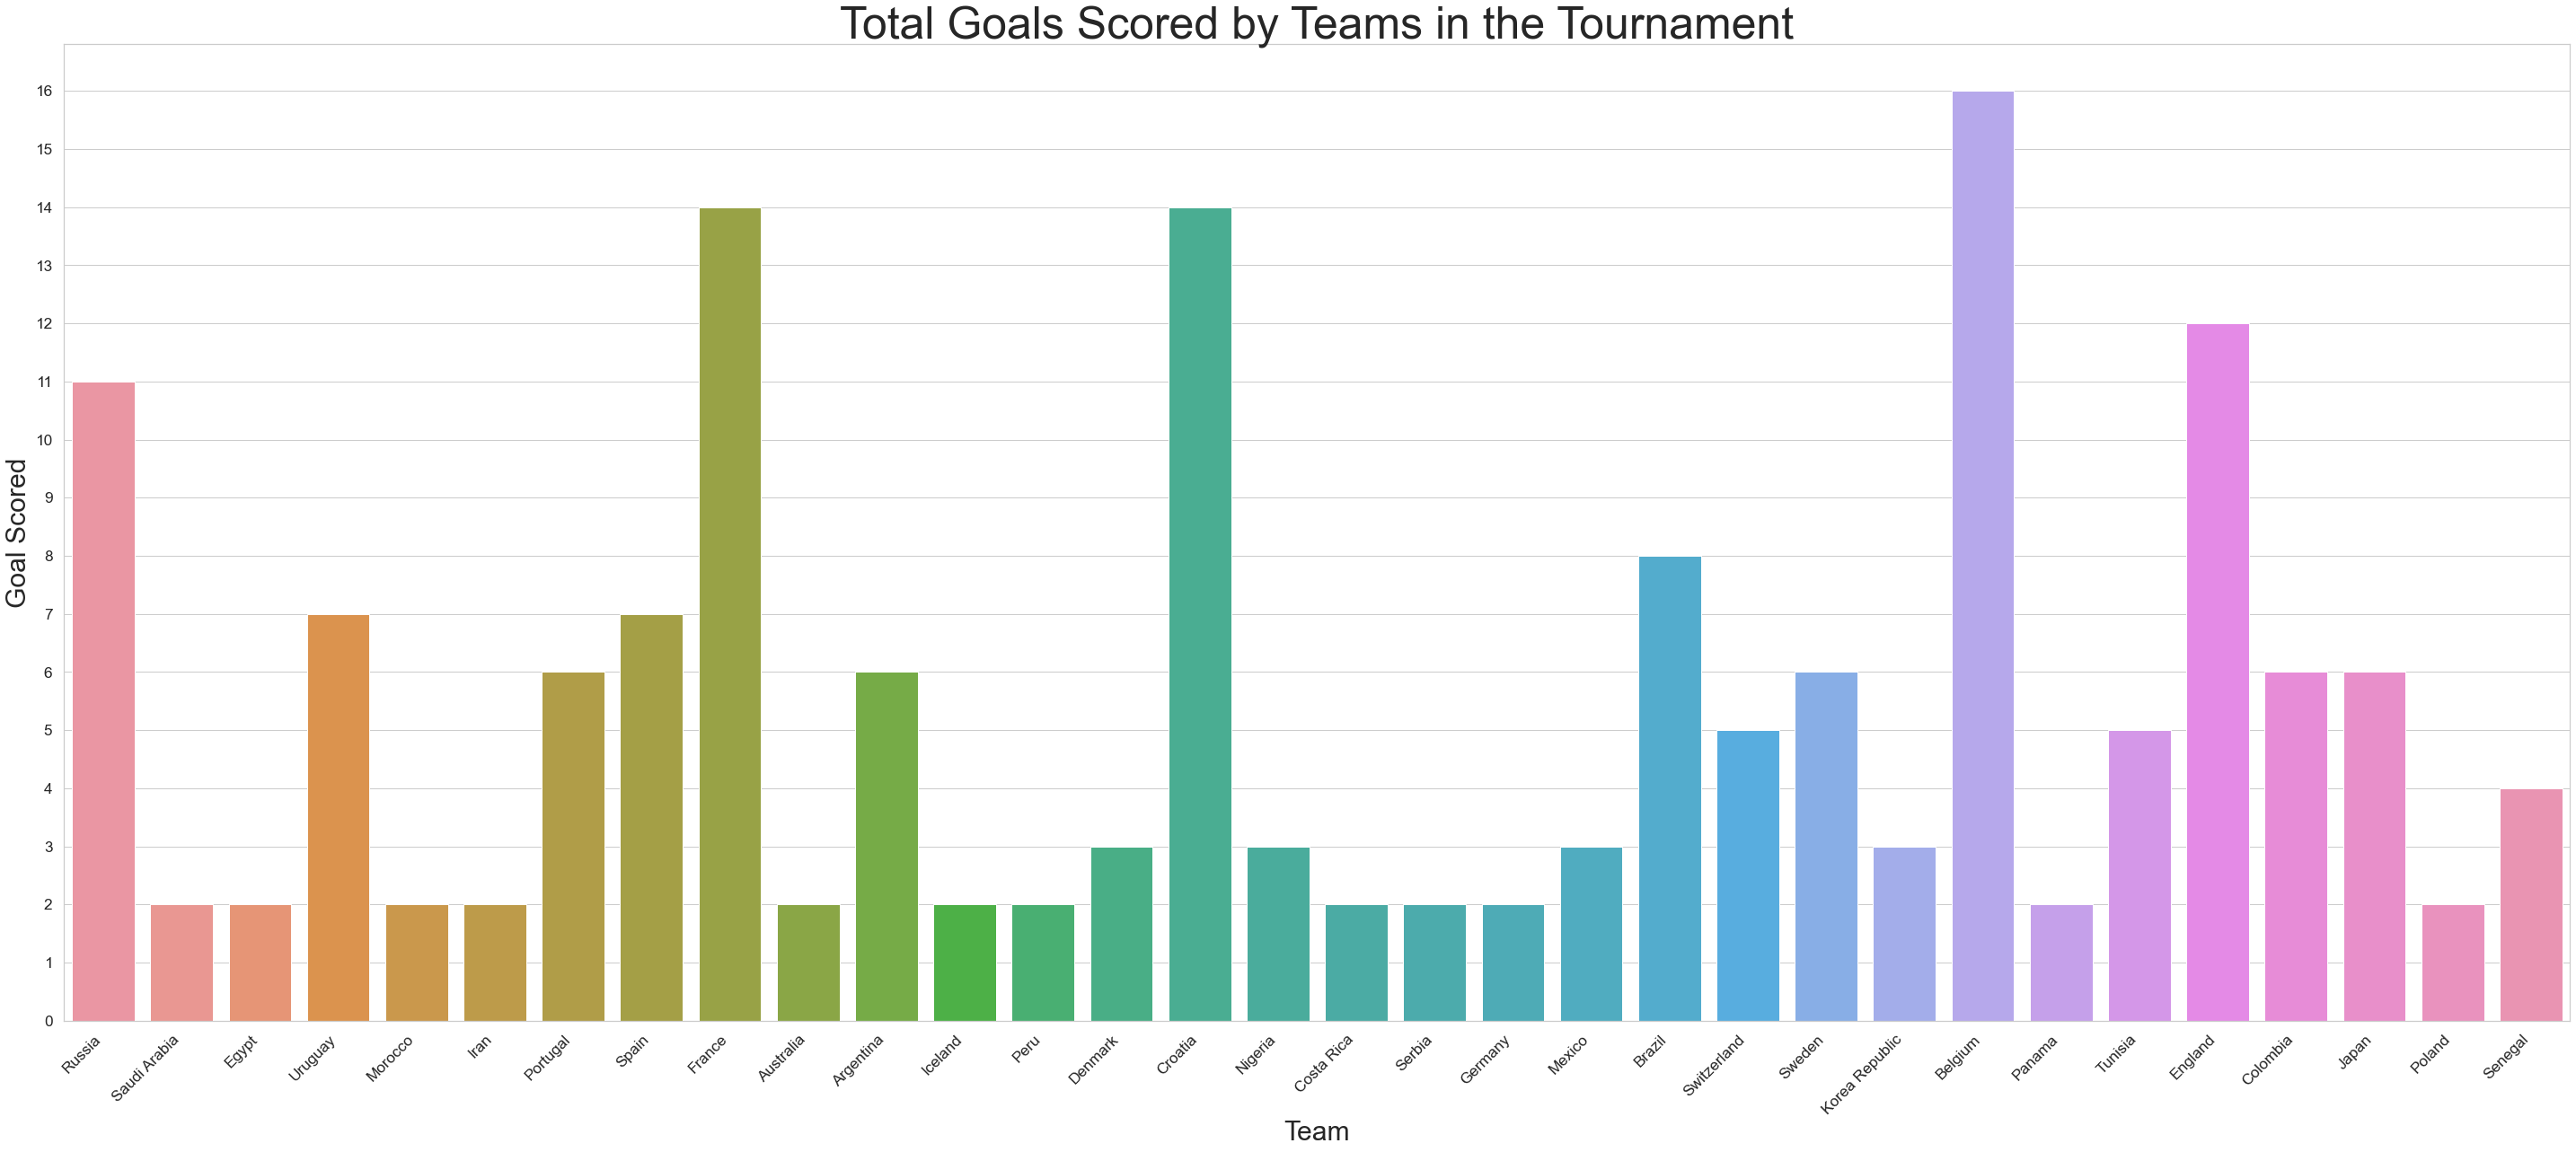

In [345]:

##Total Goals Scored by Teams in the Tournament
plt.figure(figsize=(50,20))
plt.title("Total Goals Scored by Teams in the Tournament",fontsize=50)
plt.xlabel("Team",fontsize=30)
plt.ylabel("Goal Scored",fontsize=30)
plt.yticks(np.arange(0,20,1),fontweight='light',fontsize='x-large')
sns.set(style="whitegrid")
sns.barplot(x="Team", y="Goal Scored", data=fifa_df,estimator=sum,ci=None)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

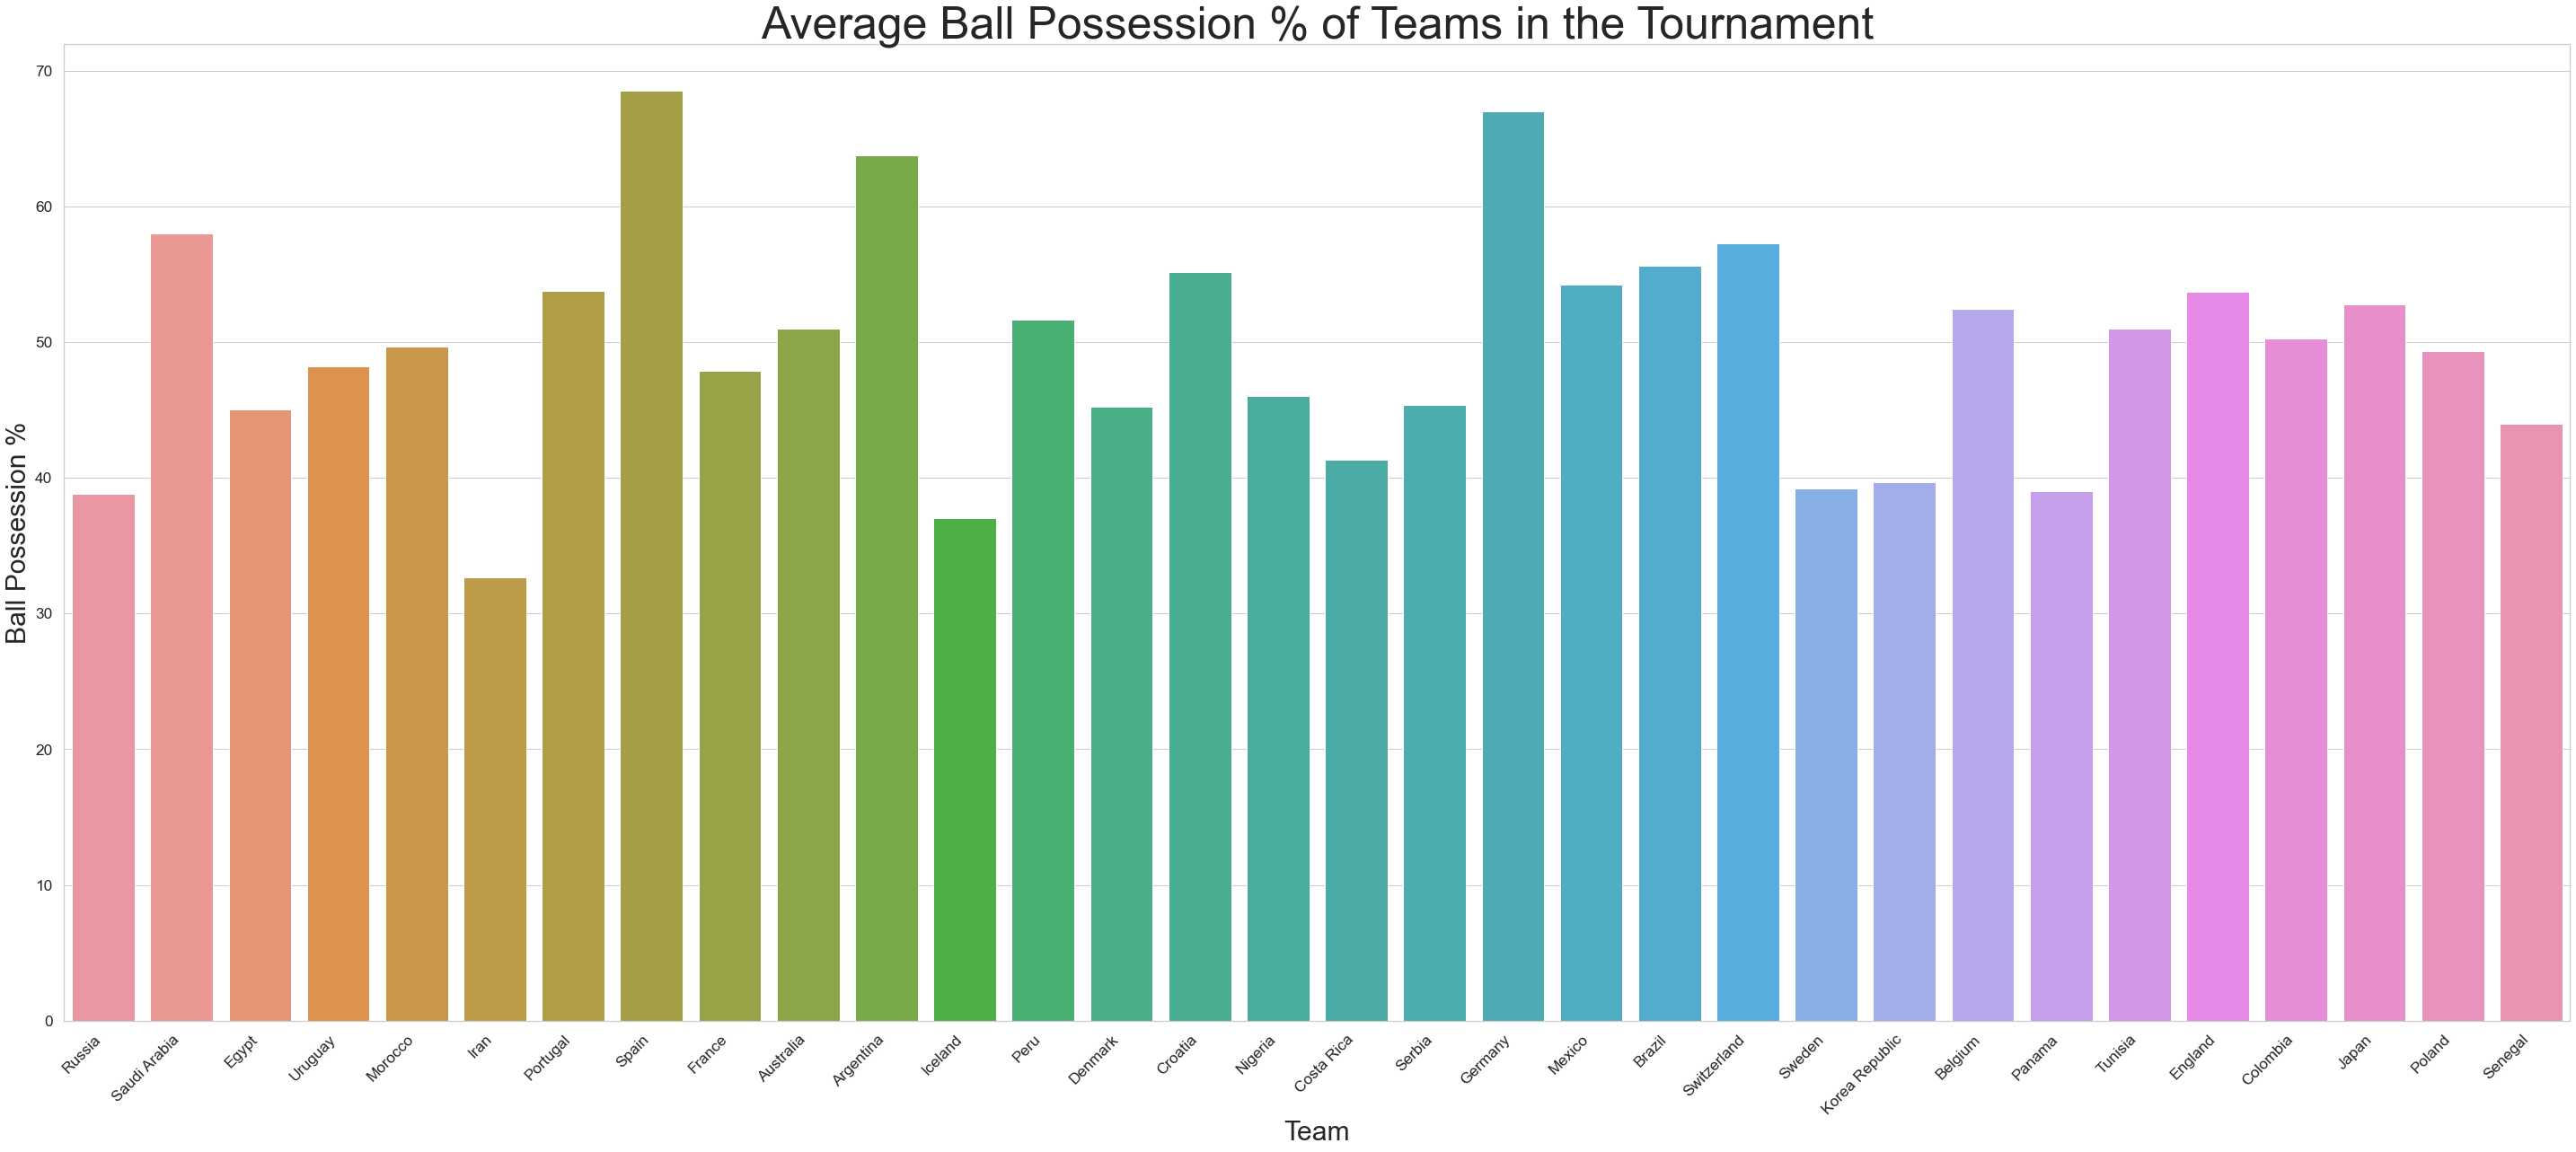

In [350]:

##Average Ball Possession % of Teams in the Tournament
plt.figure(figsize=(50,20))
plt.title("Average Ball Possession % of Teams in the Tournament",fontsize=50)
plt.xlabel("Team",fontsize=30)
plt.ylabel("Ball Possession %",fontsize=30)
plt.yticks(np.arange(0,100,10),fontweight='light',fontsize='x-large')
sns.set(style="whitegrid")
sns.barplot(x="Team", y="Ball Possession %", data=fifa_df,ci=None)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

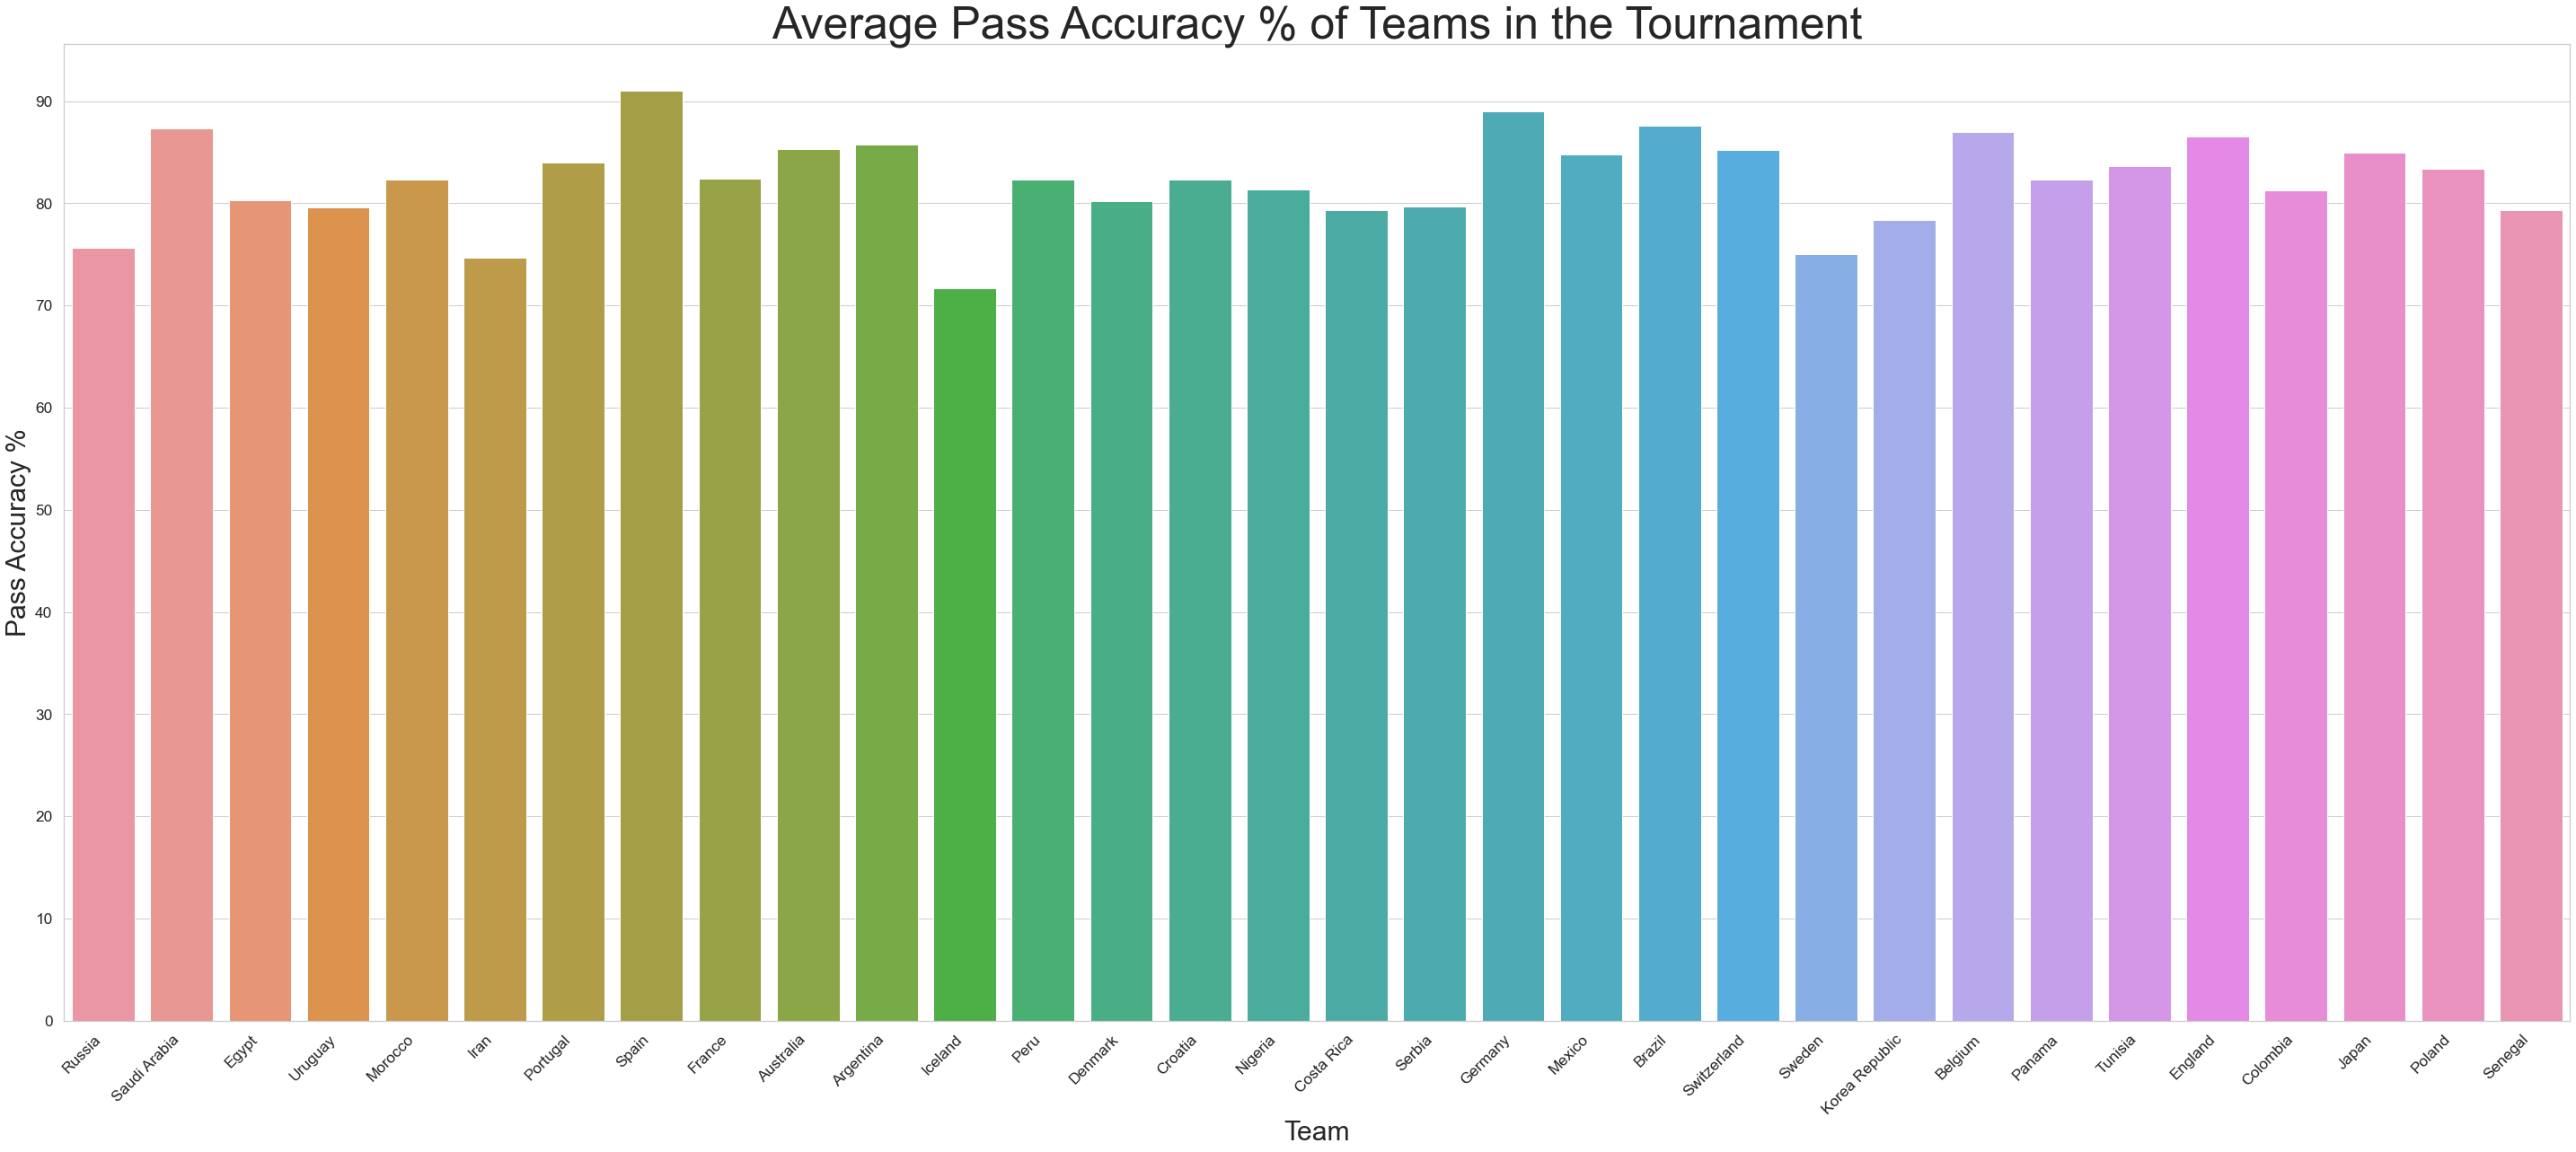

In [351]:

##Average Pass Accuracy % of Teams in the Tournament
plt.figure(figsize=(50,20))
plt.title("Average Pass Accuracy % of Teams in the Tournament",fontsize=50)
plt.xlabel("Team",fontsize=30)
plt.ylabel("Ball Possession %",fontsize=30)
plt.yticks(np.arange(0,100,10),fontweight='light',fontsize='x-large')
sns.set(style="whitegrid")
sns.barplot(x="Team", y="Pass Accuracy %", data=fifa_df,ci=None)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

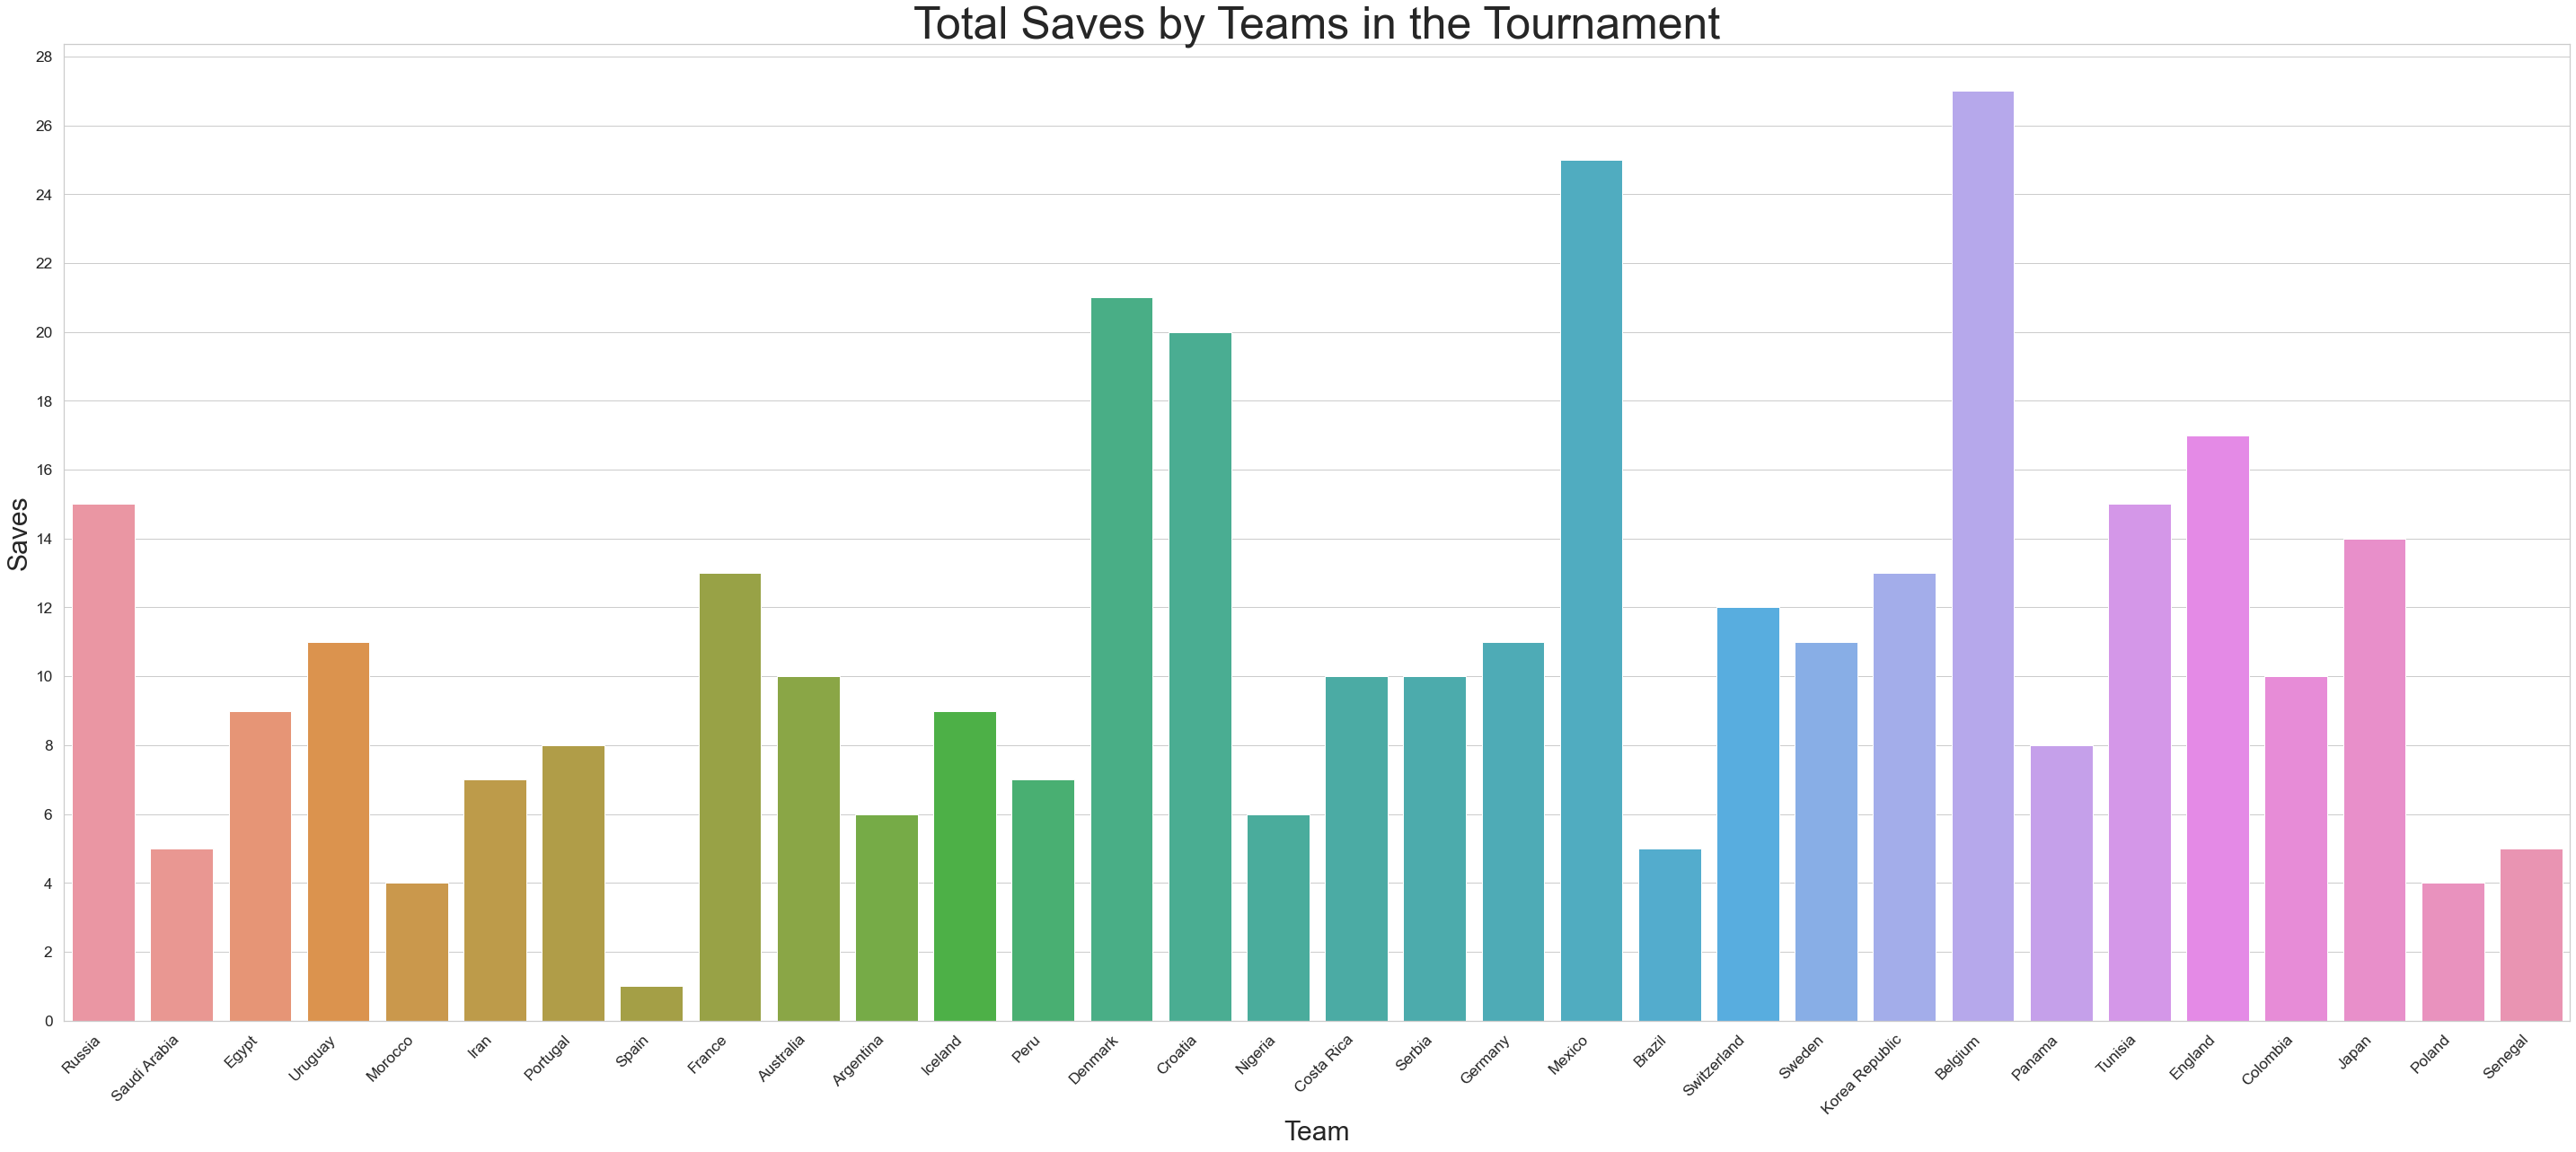

In [349]:
## Total Saves by Teams in the Tournament
plt.figure(figsize=(50,20))
plt.title("Total Saves by Teams in the Tournament",fontsize=50)
plt.xlabel("Team",fontsize=30)
plt.ylabel("Saves",fontsize=30)
plt.yticks(np.arange(0,40,2),fontweight='light',fontsize='x-large')
sns.set(style="whitegrid")
sns.barplot(x="Team", y="Saves", data=fifa_df,estimator=sum,ci=None)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')


### Observations : 

 - **Belgium** , **Croatia** , **France** and **England** are the top teams in terms of Goals Scored
 - **Belgium** , **Mexico** , **Denmark** and **Croatia** are the top teams in terms of Saves Made
 
 - In terms of Ball Possession %, **Spain** , **Germany** , **Argentina** and **Saudi Arabia** are the best teams
 - In terms of Pass Accuracy %, **Spain** , **Germany** , **Brazil** and **Saudi Arabia** are the best teams
 
 
 **The last 2 above can be mis repressentations as the teams may have been eliminated early in the tournament and thus even if the average possession and accuracy is high, they may have not fared well**
 

<a id=section502></a>
#### 5.2 Distribution of Teams in Different Tournament Stages

([<matplotlib.axis.YTick at 0x20d2bbbb108>,
 <a list of 5 Text major ticklabel objects>)

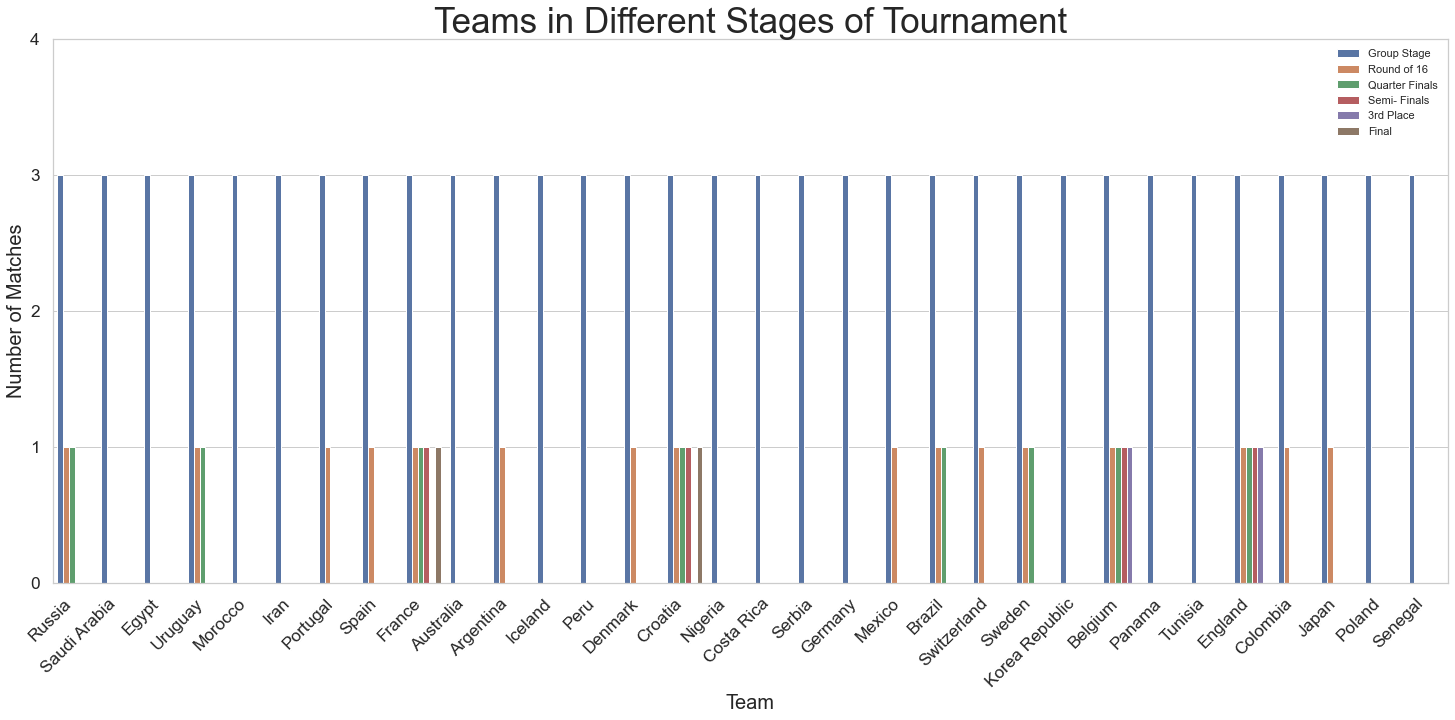

In [24]:
plt.figure(figsize=(25,10))
plt.title("Teams in Different Stages of Tournament",fontsize=35)
sns.set(style="whitegrid")
ax = sns.countplot(x="Team",hue='Round', data=fifa_df)

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.legend(loc=1)
plt.ylabel("Number of Matches",fontsize=20)
plt.xlabel("Team",fontsize=20)
plt.yticks(np.arange(0,5,1),fontweight='light',fontsize='x-large')


### Observations : 

 - **Semi Fianlist** of the tournament were - 
     - **France**
     - **Croatia**
     - **England**
     - **Belgium**
     
 - Finals was played between -
     - **France** and **Croatia**
     
 **The ultimate winners of the Tournament was ** France** **
  


<a id=section503></a>
#### 5.3 Distribution of Fouls and Cards among Teams

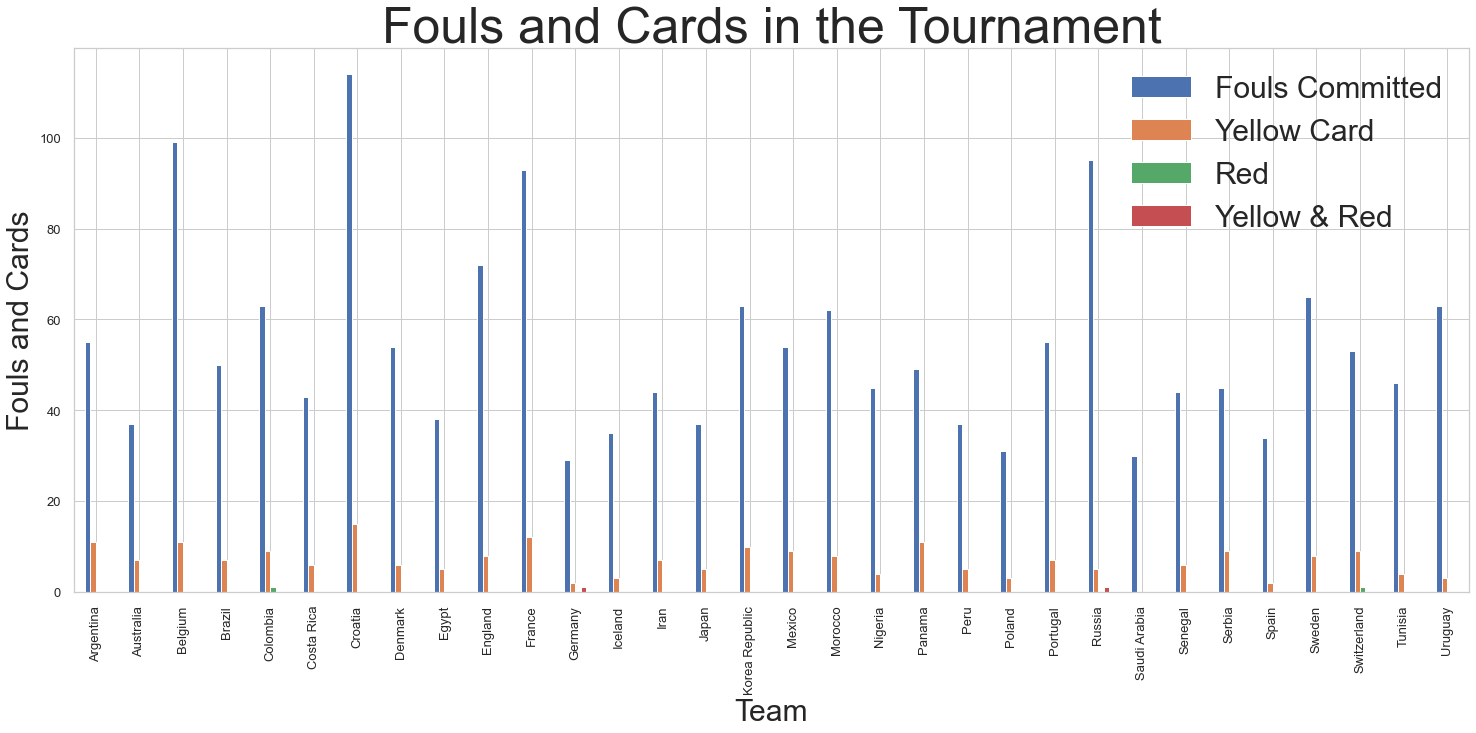

In [23]:
fifa_df.groupby('Team')['Fouls Committed','Yellow Card','Red','Yellow & Red'].sum().plot(kind='bar',figsize=(25,10),fontsize=13)
plt.title("Fouls and Cards in the Tournament",fontsize=50)
plt.ylabel("Fouls and Cards",fontsize=30)
plt.xlabel("Team",fontsize=30)
plt.legend(fontsize=30)


### Observations :

- The team with most Fouls and **Yello Cards** (undiscipline) was **Croatia**.

<a id=section504></a>
#### 5.4 Distribution of MoM Award among Teams

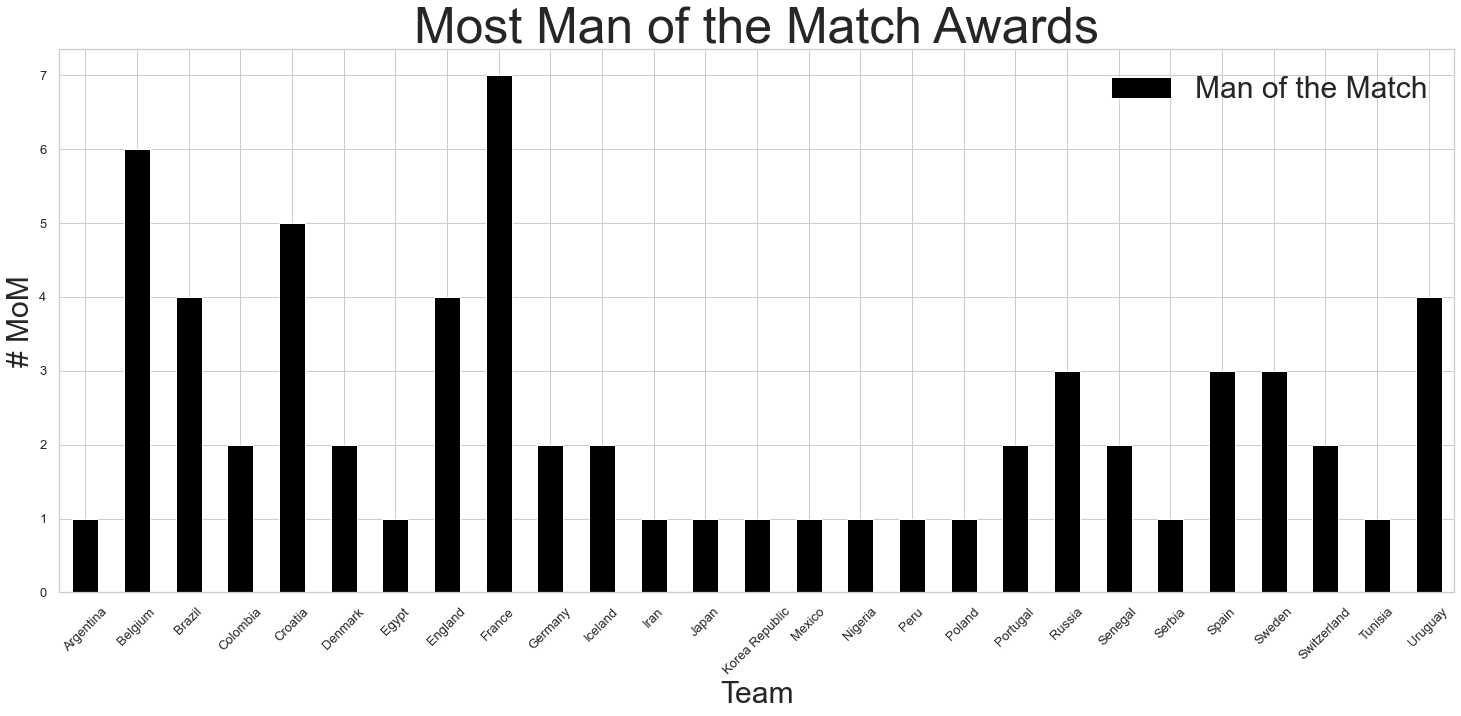

In [268]:
fifa_df[fifa_df['Man of the Match']=='Yes'].groupby('Team')['Man of the Match'].count().plot(kind='bar',figsize=(25,10),fontsize=13,color='black')
plt.title("Most Man of the Match Awards",fontsize=50)
plt.ylabel("# MoM",fontsize=30)
plt.xlabel("Team",fontsize=30)
plt.xticks(rotation=45)
plt.legend(fontsize=30)


### Observations:

- **France** won **7** out of **7** MoM Awards in their games.
- The second to that was **Belgium** with **5**, followed bu **Croatia** and **England** with **5** and **4** MoM awards respectively.

**Important thing to note here is that the teams reaching the Semi finals are the once with most MoM awards. Also, Croatia reached Finals i.e. they playe in all 6 games (excluding Finals) and won MoM in 5 of those. This highlights that eventhough chances are high but not alwayd does MoM goes to a player from winning Team**

<a id=section505></a>
#### 5.5 Generating Summary of Statistics for Analysis

In [453]:
temp1=fifa_df.groupby(['Round','Team'])[['Ball Possession %','Pass Accuracy %']].mean()

temp2=fifa_df.groupby(['Round','Team'])[['Goal Scored','Attempts','On-Target','Off-Target','Blocked','Offsides','Corners','Free Kicks','Saves','Passes','Distance Covered (Kms)','Fouls Committed','Yellow Card','Yellow & Red','Red','Goals in PSO','Own goals']].sum()

summary=pd.merge(left=temp2,right=temp1,how='inner',on=['Round','Team'])

temp3=fifa_df[(fifa_df['Man of the Match']=='Yes')].groupby(['Round','Team'])['Opponent'].count()
temp3=pd.DataFrame(data=temp3)

summary=pd.merge(left=summary,right=temp3,how='left',on=['Round','Team'])

summary['Pass Accuracy %']=round(summary['Pass Accuracy %'],2)
summary['Ball Possession %']=round(summary['Ball Possession %'],2)
summary.rename(columns={'Opponent' : 'MoM'},inplace=True)

summary.reset_index(inplace=True)
summary['MoM'].fillna(0,inplace=True)
summary
#summary.loc['Group Stage']

,Round,Team,Goal Scored,Attempts,On-Target,Off-Target,Blocked,Offsides,Corners,Free Kicks,Saves,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Goals in PSO,Own goals,Ball Possession %,Pass Accuracy %,MoM
0,3rd Place,Belgium,2,12,4,3,5,1,4,5,5,510,108,11,1,0,0,0,0,43.00,88.00,1.0
1,3rd Place,England,0,15,5,7,3,0,5,12,2,698,110,5,2,0,0,0,0,57.00,92.00,0.0
2,Final,Croatia,2,15,3,8,4,1,6,15,3,547,100,13,1,0,0,0,0,61.00,83.00,0.0
3,Final,France,4,8,6,1,1,1,2,14,1,271,99,14,2,0,0,0,1,39.00,75.00,1.0
4,Group Stage,Argentina,3,44,14,15,15,5,20,61,6,1788,303,40,6,0,0,0,0,65.33,85.67,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Round of 16,Uruguay,2,6,3,2,1,0,2,14,4,269,106,13,0,0,0,0,0,39.00,69.00,1.0
60,Semi- Finals,Belgium,0,9,3,5,1,1,5,7,4,629,102,16,3,0,0,0,0,60.00,90.00,0.0
61,Semi- Finals,Croatia,2,22,7,11,4,1,8,17,0,622,143,23,2,0,0,0,0,54.00,79.00,1.0
62,Semi- Finals,England,1,11,1,6,4,3,4,24,5,479,148,14,1,0,0,0,0,46.00,79.00,0.0


<a id=section506></a>
#### 5.6 Teams with varoius Statistical Values at Different Rounds in Tournament

In [467]:
fig = px.scatter(summary, x="Pass Accuracy %", y="Ball Possession %", color="Round",size="Passes",hover_name="Team",template='plotly',
                color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta",'black'],
                 #px.colors.cyclical.IceFire,
                 #labels ={'GF': 'Goals Scored'},
                 title="Team Statistics in different Rounds")

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=20
    #type='category'
)


fig.show()

### Observations :

- **Group Stage**
    - **Germany** had the best Ball Possession %
    - **Spain** had Maximum Passes and **Spain** and **England** both had max Pass Accuracy %.
    
- **Round of 16**
    - **Spain** had the best stats in all 3 areas (but still lost on penalties and did not proceed ahead in the tournament)
    
- **Quarter Finals**
    - **Croatia** had the best Ball Possession % and maximum Passes.
    - **Brazil** had the best Pass Accuracy %.
    
- **Semi Finals**
    - **Belgium** had the best Ball Possession % and Pass Accuracy %.
    - **Croatia** had the max Passes.
    
- **Finals**
    - **Croatia** had the best Ball Possession % , best Pass Accuracy % and maximum Passes **BUT** still lost to **France**
   

<a id=section507></a>
#### 5.7 Dummification of Columns

In [454]:
##One hot encoding of Round and PSO Columns to convert Cat into Cont

fifa_df=pd.get_dummies(fifa_df, columns=['Round','PSO'],drop_first=True)

In [455]:
fifa_df

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Goals in PSO,Own goals,Own goal Time,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,PSO_Yes
0,2018-06-14,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12,0,0,0,0,1,0,0,0,0
1,2018-06-14,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,0,0,0,0,0,1,0,0,0,0
2,2018-06-15,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,0,0,0,0,0,1,0,0,0,0
3,2018-06-15,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89,0,0,0,0,1,0,0,0,0
4,2018-06-15,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,0,0,1,90,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2018-07-11,England,Croatia,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0,No,5,0,0,0,0,0,0,0,1,0
124,2018-07-14,Belgium,England,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0,Yes,4,0,0,0,0,0,0,0,0,0
125,2018-07-14,England,Belgium,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0,No,0,0,0,0,0,0,0,0,0,0
126,2018-07-15,France,Croatia,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,Yes,18,0,1,18,1,0,0,0,0,0


<a id=section508></a>
#### 5.8 Pair Plots to Study Distribution and Relationship between Parameters

Text(0.5, 1.0, 'Pair Plot')

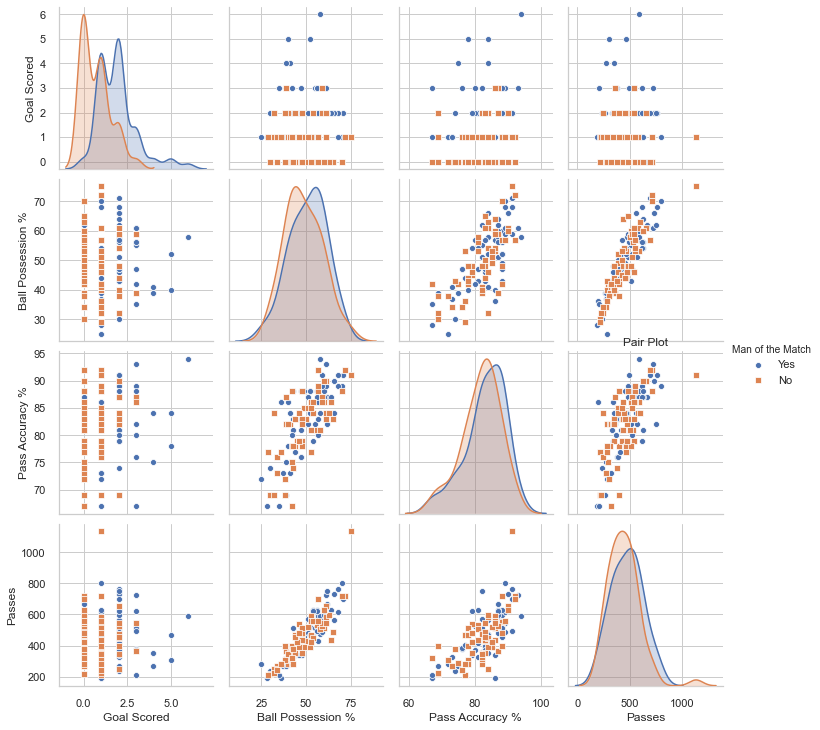

In [458]:
sns.pairplot(fifa_df[["Goal Scored","Ball Possession %","Pass Accuracy %","Passes",'Man of the Match']],vars = ["Goal Scored","Ball Possession %","Pass Accuracy %","Passes"],hue="Man of the Match", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

Text(0.5, 1.0, 'Pair Plot')

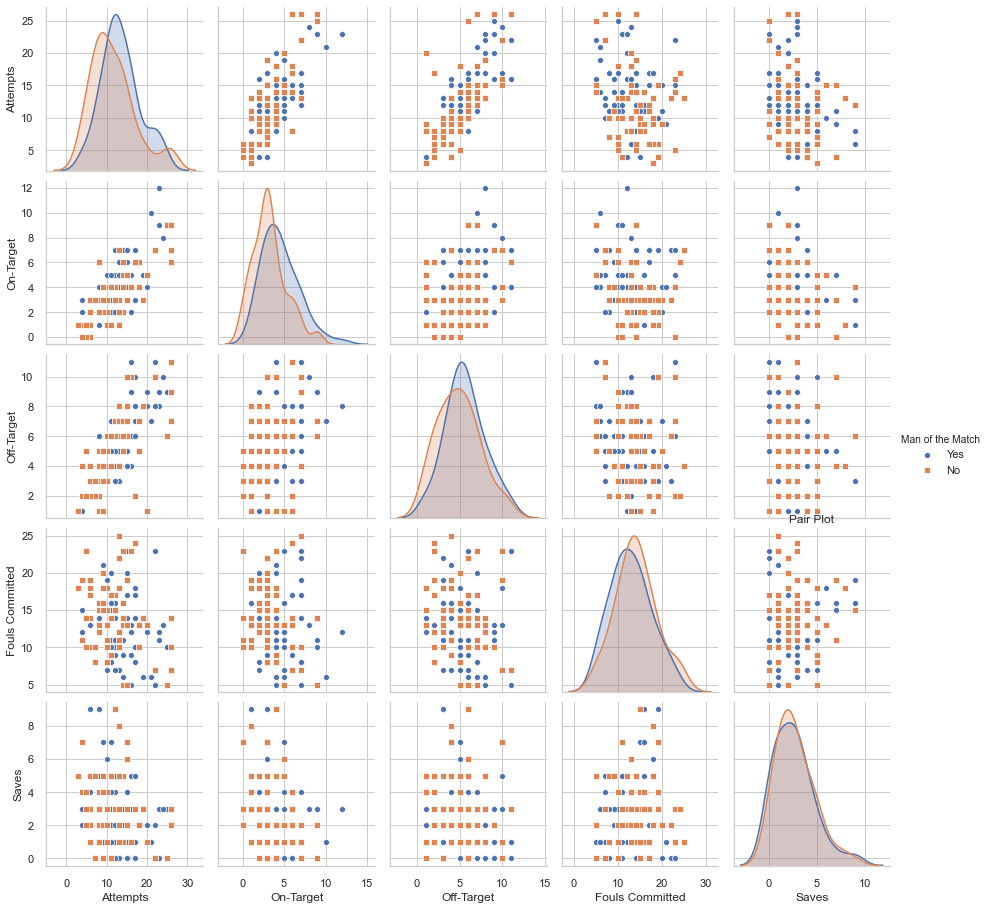

In [111]:
sns.pairplot(fifa_df[["Attempts","On-Target","Off-Target",'Fouls Committed','Saves','Man of the Match']],vars = ["Attempts","On-Target","Off-Target",'Fouls Committed','Saves'],hue="Man of the Match", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

### Observations :

- More Goals Scored do not guarantee more MoM awards.
- Ball Possession % and Passes are highly corelated .
- Not Much Correlation between parameters.
- Almost equal distribution of MoM awards in respect to all parameters and thus difficult for accurate prediction.



<a id=section509></a>
#### 5.8 Correlation Matrix  (Heat Map to study correlation between EVs)

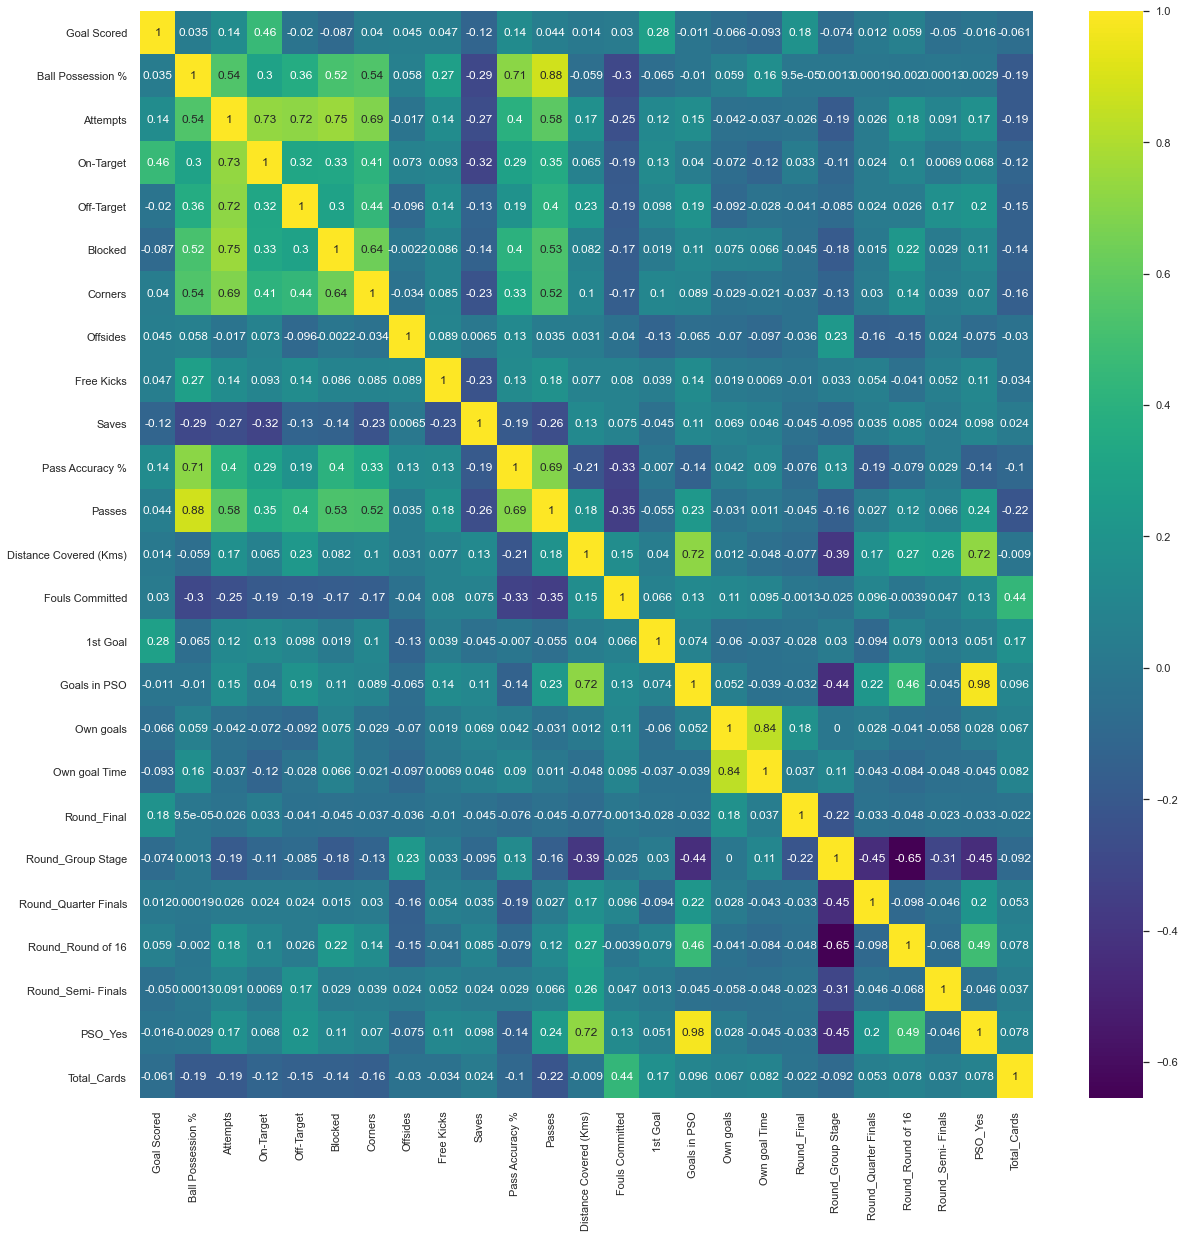

In [426]:
# Plotting the correlation matrix

corr_mat = fifa_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

<a id=section6></a>
## 6. Classification Modelling

<a id=section601></a>
#### 6.1 Identifying and Dropping ID and Highly Correlated Columns

In [456]:
fifa_df['Total_Cards']=fifa_df['Yellow Card']+fifa_df['Red']+fifa_df['Yellow & Red']

In [457]:
#Dropping ID Variables 'Date','Team','Opponent' and columns we aggregated above
fifa_df = fifa_df.drop(['Date','Team','Opponent','Red','Yellow & Red','Yellow Card'], axis = 1)
fifa_df.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Man of the Match,1st Goal,Goals in PSO,Own goals,Own goal Time,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,PSO_Yes,Total_Cards
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,Yes,12,0,0,0,0,1,0,0,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,No,0,0,0,0,0,1,0,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,No,0,0,0,0,0,1,0,0,0,0,2
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,Yes,89,0,0,0,0,1,0,0,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,No,0,0,1,90,0,1,0,0,0,0,1


In [427]:
# Create correlation matrix
corr_matrix = fifa_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [428]:
to_drop

['Passes', 'Own goal Time', 'PSO_Yes']

In [429]:
#Dropping one of the highly correlated columns 

fifa_df.drop(to_drop,axis=1,inplace=True)

In [430]:
fifa_df

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Distance Covered (Kms),Fouls Committed,Man of the Match,1st Goal,Goals in PSO,Own goals,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,Total_Cards
0,5,40,13,7,3,3,6,3,11,0,78,118,22,Yes,12,0,0,0,1,0,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,105,10,No,0,0,0,0,1,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,112,12,No,0,0,0,0,1,0,0,0,2
3,1,57,14,4,6,4,5,1,13,3,86,111,6,Yes,89,0,0,0,1,0,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,101,22,No,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,148,14,No,5,0,0,0,0,0,0,1,1
124,2,43,12,4,3,5,4,1,5,5,88,108,11,Yes,4,0,0,0,0,0,0,0,1
125,0,57,15,5,7,3,5,0,12,2,92,110,5,No,0,0,0,0,0,0,0,0,2
126,4,39,8,6,1,1,2,1,14,1,75,99,14,Yes,18,0,1,1,0,0,0,0,2


<a id=section602></a>
#### 6.2 Preparing the data (X and y) for Classification Models

In [38]:
#Dividing data into EVs and TV

X = fifa_df.loc[:,fifa_df.columns != 'Man of the Match']
y = fifa_df['Man of the Match']

print(X.shape,y.shape)

(128, 24) (128,)


<a id=section603></a>
#### 6.3 Splitting the data into Train and Test datasets

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(102, 24)
(102,)
(26, 24)
(26,)


<a id=section604></a>
#### 6.4 Scaling (As we have a number of EVs with various different units)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_test_sc = scaler.transform(X_test)
X_train_sc = scaler.transform(X_train)

<a id=section605></a>
#### 6.5 Score Calcluator and Aggregator Function for Different Models

In [216]:
index= ['Logistic Regression','Decision Tree','Decision Tree with GridSearch','Random Forest','Random Forest with GridSearch']

Score = pd.DataFrame(index=index,columns = ['Accuracy Score','Recall','Precision','F1 Score','ROC AUC'])

In [177]:
def update_score(algo,y_pred_test,y_pred_prob_test):
    Score.loc[algo] = [accuracy_score(y_test,y_pred_test),recall_score(y_test,y_pred_test,pos_label='Yes'),
                       precision_score(y_test,y_pred_test,pos_label='Yes'),f1_score(y_test,y_pred_test,pos_label='Yes'),
                       roc_auc_score(y_test, y_pred_prob_test[:,1])]

<a id=section606></a>
## 6.6 Logistic Regression Model

In [89]:
## Buildind and Training the model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_sc,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
## Logistic Model Predictions

y_pred_train_logreg = log_reg.predict(X_train_sc)
y_pred_test_logreg = log_reg.predict(X_test_sc)
y_pred_prob_test_logreg = log_reg.predict_proba(X_test_sc)

In [218]:
## Updating Score Scummary Table with Accuracy Score, Recall, Precision, F1 Score and ROC AUC

update_score('Logistic Regression',y_pred_test_logreg,y_pred_prob_test_logreg)


## Confusion Matrix

confusion_matrix = pd.DataFrame(cm(y_test, y_pred_test_logreg))
confusion_matrix.index = ['Actual No','Actual Yes']
confusion_matrix.columns = ['Predicted No','Predicted Yes']
print("Logistic Regression Confusion Matrix - ")
print(confusion_matrix)




Logistic Regression Confusion Matrix - 
            Predicted No  Predicted Yes
Actual No   9             4            
Actual Yes  3             10           


<a id=section607></a>
## 6.7 Decision Tree Model

In [136]:
## Preparing/Instatiating the model

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_sc,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
 #import sys
 #! pip install graphviz
 #!{sys.executable} -m pip install pydotplus
 #!{sys.executable} -m pip install Ipython

 #!{sys.executable} -m pip install pydot

In [466]:
#from sklearn.tree import export_graphviz
#import pydot
#import pydotplus
#from IPython.display import Image

#dot_data = export_graphviz(dt, 
#                out_file=None,
#                feature_names= X.columns, 
#                rounded=True, 
#                precision=4, 
#                node_ids=True, 
#                proportion=True,
#                filled=True)

#(graph,) = pydot.graph_from_dot_file('my.dot')
#graph.write_png('decision_tree.png')

#Image(filename='decision_tree.png') 



# Draw graph
#graph = pydot.graph_from_dot_data(dot_data)


# Show graph
#Image(graph.create_png())
#Image(graph[0].create_png())

# Create PDF
#graph.write_pdf("iris.pdf")

# Create PNG
#graph.write_png("iris.png")

IndentationError: unexpected indent (<ipython-input-466-1f056d67c5d6>, line 12)

In [137]:
## Decision Tree Model Preictions

y_pred_train_dt = dt.predict(X_train_sc)
y_pred_test_dt = dt.predict(X_test_sc)
y_pred_prob_test_dt = dt.predict_proba(X_test_sc)

In [219]:
## Updating Score Scummary Table with Accuracy Score, Recall, Precision, F1 Score and ROC AUC

update_score('Decision Tree',y_pred_test_dt,y_pred_prob_test_dt)


## Confusion Matrix

confusion_matrix = pd.DataFrame(cm(y_test, y_pred_test_logreg))
confusion_matrix.index = ['Actual No','Actual Yes']
confusion_matrix.columns = ['Predicted No','Predicted Yes']
print("Decision Tree Confusion Matrix - ")
print(confusion_matrix)




Decision Tree Confusion Matrix - 
            Predicted No  Predicted Yes
Actual No   9             4            
Actual Yes  3             10           


<a id=section60701></a>
### 6.7.1 Decision Tree with GridSearchCV


In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

dt_grid_search = GridSearchCV(dt,tree_para, cv=10, refit='AUC')
dt_grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
             

In [140]:
## Decision Tree Model Preictions

y_pred_train_dt_grid = dt_grid_search.predict(X_train_sc)
y_pred_test_dt_grid = dt_grid_search.predict(X_test_sc)
y_pred_prob_test_dt_grid = dt_grid_search.predict_proba(X_test_sc)

In [220]:
## Updating Score Scummary Table with Accuracy Score, Recall, Precision, F1 Score and ROC AUC

update_score('Decision Tree with GridSearch',y_pred_test_dt_grid,y_pred_prob_test_dt_grid)


## Confusion Matrix

confusion_matrix = pd.DataFrame(cm(y_test, y_pred_test_logreg))
confusion_matrix.index = ['Actual No','Actual Yes']
confusion_matrix.columns = ['Predicted No','Predicted Yes']
print("Decision Tree (with GridSearch) Confusion Matrix - ")
print(confusion_matrix)




Decision Tree (with GridSearch) Confusion Matrix - 
            Predicted No  Predicted Yes
Actual No   9             4            
Actual Yes  3             10           


<a id=section608></a>
## 6.8 Random Forest Classification Model

In [142]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)

rf.fit(X_train_sc,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [143]:
## Decision Tree Model Preictions

y_pred_train_rf = rf.predict(X_train_sc)
y_pred_test_rf = rf.predict(X_test_sc)
y_pred_prob_test_rf = rf.predict_proba(X_test_sc)

In [221]:
## Updating Score Scummary Table with Accuracy Score, Recall, Precision, F1 Score and ROC AUC

update_score('Random Forest',y_pred_test_rf,y_pred_prob_test_rf)


## Confusion Matrix

confusion_matrix = pd.DataFrame(cm(y_test, y_pred_test_logreg))
confusion_matrix.index = ['Actual No','Actual Yes']
confusion_matrix.columns = ['Predicted No','Predicted Yes']
print("Random Forest Confusion Matrix - ")
print(confusion_matrix)




Random Forest Confusion Matrix - 
            Predicted No  Predicted Yes
Actual No   9             4            
Actual Yes  3             10           


<a id=section60801></a>
### 6.8.1 Random Forest Classification with GridSearchCV

In [461]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,5),
              #"min_samples_split": sp_randint(2, 11),
              #"min_samples_leaf": sp_randint(1, 6),
              "bootstrap": [True, False],
              "n_estimators": [100, 300, 500,700, 1000],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }

#n_iter_search = 50
rf_grid_search = GridSearchCV(rf, param_dist,scoring='accuracy')
rf_grid_search.fit(X_train_sc,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                

In [462]:
## Decision Tree Model Preictions

y_pred_train_rf_grid = rf_grid_search.predict(X_train_sc)
y_pred_test_rf_grid = rf_grid_search.predict(X_test_sc)
y_pred_prob_test_rf_grid = rf_grid_search.predict_proba(X_test_sc)

In [463]:
## Updating Score Scummary Table with Accuracy Score, Recall, Precision, F1 Score and ROC AUC

update_score('Random Forest with GridSearch',y_pred_test_rf_grid,y_pred_prob_test_rf_grid)


## Confusion Matrix

confusion_matrix = pd.DataFrame(cm(y_test, y_pred_test_logreg))
confusion_matrix.index = ['Actual No','Actual Yes']
confusion_matrix.columns = ['Predicted No','Predicted Yes']
print("Random Forest (with Grid Search) Confusion Matrix - ")
print(confusion_matrix)




Random Forest (with Grid Search) Confusion Matrix - 
            Predicted No  Predicted Yes
Actual No   9             4            
Actual Yes  3             10           


<a id=section7></a>
## 7. Model Evaluation

In [464]:
print('Comparison of Models - ')
Score

Comparison of Models - 


,Accuracy Score,Recall,Precision,F1 Score,ROC AUC
Logistic Regression,0.730769,0.769231,0.714286,0.740741,0.781065
Decision Tree,0.538462,0.307692,0.571429,0.4,0.538462
Decision Tree with GridSearch,0.769231,1,0.684211,0.8125,0.769231
Random Forest,0.769231,0.846154,0.733333,0.785714,0.789941
Random Forest with GridSearch,0.730769,0.923077,0.666667,0.774194,0.804734


<a id=section8></a>
## 8. Understanding Evaluation Techniques and Conclusion :

- **High Recall ~~ Lower False Negatives**

In our use case this implies to lower no of predictions where a Team won MoM but our model did not predict

- **High Precision ~~ Lower False Positives**

In our use case this implies to lower no of predictions where a Team did not win MoM but our model predicted them as won.

---
---
One of the use of this analysis would be by Gaming Professionals who participate in the Virtual Fantasy Leagues. In such Leagues, the MoM awardees get bonus points which can be a deciding factor in the final outcomes. Thus, in our case both False Positives and False Negatives have adverse effect and thus **Accuracy** is the best parameter to judge a model.

Thus, as per the results, **Decision Tree Model (with GridSearch)** and **Random Forest Classification (without GridSearch)** provide us with the best results with an Accuracy of **76.92%** and can be used for the Classification process

